## Wine Quality Predictions using simple ANN

In [1]:
#!pip install livelossplot
import livelossplot

In [2]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
dataset = pd.read_csv('Data//winequality-red.csv', sep =';')

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check for missing values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# value counts of wine quality
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
# X and y
X = dataset.iloc[:,0:11].values
y = dataset.iloc[:,11].values

In [10]:
# y is of int type. Change it to categorical
y = y.astype('object')

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [12]:
#  one hot encoding -- we can use pandas_dummies!
from keras.utils import np_utils
y = np_utils.to_categorical(y)

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [13]:
y = y[:,1:]

In [14]:
y[0] # 5 categories, each can have 0/1 for prediction

array([0., 1., 0., 0., 0.], dtype=float32)

In [15]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Import Keras libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#y_test

# ANN

In [19]:
ann_classifier = Sequential()

In [20]:
ann_classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
ann_classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

In [21]:
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
plot_losses = livelossplot.PlotLossesKeras()

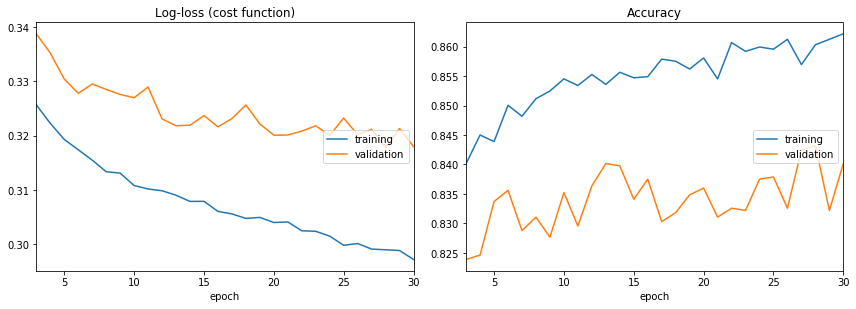

Log-loss (cost function):
training   (min:    0.297, max:    0.408, cur:    0.297)
validation (min:    0.318, max:    0.355, cur:    0.318)

Accuracy:
training   (min:    0.815, max:    0.862, cur:    0.862)
validation (min:    0.823, max:    0.843, cur:    0.840)


In [23]:
ann_classifier.fit(X_train, y_train, 
                   batch_size = 5, 
                   callbacks = [plot_losses],
                   epochs = 30,
                   validation_data = (X_test, y_test)) # Less epochs - Basic Model
# Look at the loss curves, is the model overfitting?

In [24]:
ann_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 997
Trainable params: 997
Non-trainable params: 0
_________________________________________________________________


In [25]:
# in layer column, _1, _2, _3 etc are randomly created by the model, just to avoid duplication
# Param:
# 384 = (input to each node) 11 * 32 (no of neurons) + 32 (no_biases)
# 528 = 16 (neurons) * 32 (inputs) + 16(no_biase) = 528
# 85 = 16 (input to each neuran) * 5 (no of neurons) + 5(no_biase)

In [26]:
# Prediction
y_pred = ann_classifier.predict(X_test)

In [27]:
len(y_pred)

528

In [28]:
y_pred[0:5] # softmax return the probability for each class, higher is the predicted

array([[9.8173488e-03, 4.8693070e-01, 4.7933778e-01, 2.3585141e-02,
        3.2903306e-04],
       [2.8578801e-02, 8.4521228e-01, 1.2543879e-01, 7.6678878e-04,
        3.3372887e-06],
       [1.4503414e-02, 3.5751650e-01, 5.6760556e-01, 5.8480173e-02,
        1.8943574e-03],
       [1.9960906e-02, 5.9589791e-01, 3.7791190e-01, 6.1914632e-03,
        3.7842041e-05],
       [2.9920595e-02, 2.7497390e-01, 6.3120925e-01, 6.1919868e-02,
        1.9763703e-03]], dtype=float32)

In [29]:
maxi = y_pred.max(axis=1)
for i in range(len(y_pred)):
    for j in range(5): # 5 classes of wine
        if y_pred[i,j] == maxi[i]: # looping over i,j for each i, j will run for 5 times
            y_pred[i,j] = 1
        else:
            y_pred[i,j] = 0

In [30]:
#len(maxi)

In [31]:
#maxi = y_pred.max(axis=1)
#maxi

In [32]:
y_pred

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
# accuracy using evaluate
loss, accuracy = ann_classifier.evaluate(X_test, y_test)

528/528 [==============================] - 0s 38us/step


In [34]:
accuracy

0.840151512261593

In [35]:
loss # minimized error -- idealy should be close to 0

0.31797481937841937

In [36]:
# Accuracy    
crt_values = (y_pred == y_test).sum()
wrong_values = (y_pred != y_test).sum()
total = crt_values+wrong_values
result = crt_values/total
print(result) # 86% accuracy

0.8378787878787879
